# Caso Práctico 
#### Marc Benedico Soler

En este caso práctico se analizará los datos de una compañía de telefónica para predecir el comportamiento de los clientes y evitar que se cambien a otra compañía. Dicho estudio se realizará con python 3. Dicho analisis se hará a partir del dataset de [Teleco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)

## Paso 1:
### Obtención de los datos
Primero de todo hay que descargar de la plataforma Kaggle los de la datos. Para descargar los datos en formato .CSV pulsa [aquí](https://www.kaggle.com/blastchar/telco-customer-churn/download). Para que el código expuesto en este informe funcione, se tiene que descomprimir el archivo ZIP descargado en la misma carpeta que se ejecutará el código.

## Paso 2:
### Importación de las librerias
A continuación se importan las librerias que se van a utilizar para analizar los datos.

In [1]:
import numpy as np #algebra lineal
import pandas as pd #dataframes
import matplotlib.pyplot as plt #visualizacion
import timeit

## Paso 3:
### Carga de los datos y análisis preliminar

Primero se carga el archivo original y se le asigna la variable teleco_original. Para verificar que se ha cargado correctamente el archivo, imprimimos una muestra aleatoria de 5 valores.

In [2]:
teleco_original =  pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
teleco_original.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3981,1200-TUZHR,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,85.20,695.75,No
4583,2400-XIWIO,Female,0,Yes,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,90.10,6310.9,No
5643,0231-LXVAP,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,75.90,75.9,Yes
5936,9418-RUKPH,Female,0,Yes,Yes,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.95,756.4,No
218,2040-LDIWQ,Male,0,Yes,Yes,65,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),84.20,5324.5,No


Una vez mostrada la tabla, se puede observar que para cada cliente se dispone de la siguiente información:
1. *customerID*: Muestra el identificador de un cliente
1. *gender*: Muestra el genero del cliente
1. *SeniorCitizen*: Muestra si el cliente es mayor de 65 años (1) o si es menor (2)
1. *Partner*: Indica si el cliente es socio (Yes) o no (No)
1. *Dependents*: Indica si el cliente tiene personas a cargo (Yes) o no (No)
1. *tenure*: Indica el numero de meses que el cliente ha estado en la compañía
1. *PhoneService*: Indica si el cliente tiene servicio de telefono (Yes) o no (No)
1. *MultipleLines*: Indica si el cliente tiene multiples lineas contratadas (Yes) o no (No) o si no tiene servicio de telefono (No phone service)
1. *InternetService*: Indica si el cliente tiene el servicio de internet DSL (DSL) o Fibra optica (Fiber optic) o si no tienen ningun servicio de internet (No)
1. *OnlineSecurity*: Indica si el cliente tiene el servicio de seguridad online (Yes) o no (No) o si no tiene ningun servicio de internet (No internet service)
1. *OnlineBackup*: Indica si el cliente tiene el servicio de recuperación (Yes) o no (No) o si no tiene ningun servicio de internet (No internet service)
1. *DeviceProtection*: Indica si el cliente tiene el servicio de proteción del telefono (Yes) o no (No) o si no tiene ningun servicio de internet (No internet service)
1. *TechSupport*: Indica si el cliente tiene el servicio de atención técnica (Yes) o no (No) o si no tiene ningun servicio de internet (No internet service)
1. *StreamingTV*: Indica si el cliente tiene el servicio de peliculas en streaming (Yes) o no (No) o si no tiene ningun servicio de internet (No internet service)
1. *Contract*: Indica si el cliente tiene un contrato mensual (Month-to-month) si es anual (One year) o si es bianual (Two year)
1. *PaperlessBilling*: Indica si el cliente recibe las facturas sin papel (Yes) o no (No)
1. *PaymentMethod*: Indica si el cliente paga electronicamente (Electronic check), por correo (mailed check), por transferencia bancaria (Bank transfer (automatic)), o por tarjeta de credito (Credit card (automatic))
1. *MonthlyCharges*: Indica la cantidad que paga el cliente cada mes
1. *TotalCharges*: Indica la cantidad total que ha pagado un cliente
1. *Churn*: Indica si el cliente ha abandonado la compañía (Yes) o no (No)

A continuación se evalúa la cantidad de datos que se disponen además de presentar un primer analisi de dichos datos

In [3]:
print("El numero de filas que disponemos es: ", teleco_original.shape[1])
print("El numero de columnas que disponemos es: ", len(teleco_original))
print("El total de datos que disponemos es: ", teleco_original.size)
teleco_original.describe(include="all")

El numero de filas que disponemos es:  21
El numero de columnas que disponemos es:  7043
El total de datos que disponemos es:  147903


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5093-FEGLU,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Paso 4:
### Procesamiento de los datos

Partiendo de los datos importados, se crea un nuevo dataset eliminando las columnas que son interesantes para este análisis. Entre todas las variables iniciales, se elimina:
- *customerID*
- *PaperlessBilling*
- *PaymentMethod*

In [4]:
teleco = (
    teleco_original
    [["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]]
   )
teleco.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4791,Male,0,Yes,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,49.65,No
4605,Male,0,Yes,No,63,Yes,Yes,DSL,No,Yes,No,Yes,No,Two year,No,Mailed check,67.25,4234.15,No
1847,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1083,No
4359,Female,0,No,No,23,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),98.70,2249.1,No
2942,Male,0,No,No,46,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.95,907.05,No


A continuación, a todas las columnas con valores "Yes", "No", "No internet service" o "No phone service", se cambiará el "Yes" por 1 y el "No", el "No internet service" o "No phone service" por 0.
Para hacerse, se substituirá en el dataframe las columnas de las variables por sigo mismas con los valores cambiados. De esta forma, se mantendrá el nombre de la variable teleco (no crearemos ninguna nueva). Dicho cambio se hará en las variables:
1. _Partner_
1. _Dependents_
1. _PhoneService_
1. _MultipleLines_
1. _OnlineSecurity_
1. _OnlineBackup_
1. _DeviceProtection_
1. _TechSupport_
1. _StreamingTV_
1. _TotalCharges_
1. _Churn_

In [5]:
teleco.gender = teleco.gender.replace({"Female": 1, "Male": 0})
teleco.Partner = teleco.Partner.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.Dependents = teleco.Dependents.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.PhoneService = teleco.PhoneService.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.MultipleLines = teleco.MultipleLines.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.OnlineSecurity = teleco.OnlineSecurity.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.OnlineBackup = teleco.OnlineBackup.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.DeviceProtection = teleco.DeviceProtection.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.TechSupport = teleco.TechSupport.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.StreamingTV = teleco.StreamingTV.replace({"Yes": 1, "No": 0, "No internet service" : 0, "No phone service": 0})
teleco.TotalCharges = teleco.TotalCharges.replace({"": 0, " ": 0})
teleco.Churn = teleco.Churn.replace({"Yes": 1, "No": 0})


teleco.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3053,0,0,1,1,65,1,1,Fiber optic,0,0,1,1,1,Two year,Yes,Bank transfer (automatic),104.10,6700.05,0
3050,1,0,0,0,5,1,0,Fiber optic,0,0,0,1,0,Month-to-month,Yes,Credit card (automatic),85.40,425.9,1
3511,0,0,0,0,53,1,1,No,0,0,0,0,0,Two year,No,Mailed check,24.60,1279,0
6872,1,0,1,0,63,1,0,Fiber optic,1,0,1,0,0,One year,Yes,Credit card (automatic),81.15,5224.5,0
2269,1,0,0,0,1,1,0,Fiber optic,0,0,0,0,0,Month-to-month,No,Mailed check,70.90,70.9,1


Además, la variable "tenure" se quiere fragmentar en 4 grupos (de 0 a 20, de 20 a 40, de 40 a 60 y de 60 a 80). Para ello se crea una nueva columna en el DataFrame.

In [6]:
def tenure_group(teleco):
    if teleco["tenure"] <= 20:
        return "0-20"
    elif (teleco["tenure"] > 20 & teleco["tenure"] <= 40):
          return "20-40"
    elif (teleco["tenure"] > 40 & teleco["tenure"] <= 60):
          return "40-60"
    else:
          return "60-80"

teleco["TenureByGroup"] = teleco.apply(lambda teleco:tenure_group(teleco), axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [7]:
teleco.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureByGroup
1041,1,0,0,1,16,1,0,No,0,0,0,0,0,One year,Yes,Bank transfer (automatic),19.30,360.35,0,0-20
4162,1,0,1,1,72,0,0,DSL,1,1,1,1,1,Two year,No,Bank transfer (automatic),65.70,4575.35,0,20-40
4315,1,0,0,0,1,1,0,Fiber optic,0,0,0,0,1,Month-to-month,No,Electronic check,79.55,79.55,1,0-20
2882,1,0,0,0,11,1,0,DSL,0,0,0,0,1,Month-to-month,Yes,Electronic check,64.90,716.1,0,0-20
1991,0,0,1,1,45,1,1,DSL,0,1,1,0,1,One year,No,Credit card (automatic),78.75,3600.65,0,20-40


In [8]:
teleco.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureByGroup
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043.000000,7043.0,7043.000000,7043
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,2,4,NaN,6531.0,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,NaN,0.0,NaN,20-40
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,3875,4171,2365,NaN,11.0,NaN,4165
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,NaN,NaN,NaN,64.761692,NaN,0.265370,NaN
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,NaN,NaN,NaN,30.090047,NaN,0.441561,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,18.250000,NaN,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,35.500000,NaN,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,70.350000,NaN,0.000000,NaN
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,89.850000,NaN,1.000000,NaN


Como para tener algunos servicios, previamente se tiene que tener otros servicios contratados (por ejemplo: para tener MultipleLines se requiere tener contratado PhoneService), los porcentajes extraidos a partir de la media función describe, no son correctos ya que, si no se tiene contratado PhoneService y como consecuencia, no se puede contratar MultipleLines, este caso no debería afectar al porcentaje de gente que tiene cotnratado MultipleLines. Lo mismo pasa para los casos con InternetService:
1. _OnlineSecurity_
1. _OnlineBackup_
1. _DeviceProtection_
1. _TechSupport_
1. _StreamingTV_

Para conseguir resolver estos casos, se decide ejecutar el codigo y medir el tiempo de ejecución.

In [9]:
start_time = timeit.default_timer()

RealPhoneService = 0
RealMultipleLines = 0

for i in (range(len(teleco["MultipleLines"]))):
    if (teleco["MultipleLines"].loc[i] == 1):
        RealMultipleLines = RealMultipleLines + 1
        RealPhoneService = RealPhoneService + 1
    elif (teleco["PhoneService"].loc[i] == 1):
        RealPhoneService = RealPhoneService + 1


        RealOnlineSecurity = 0
RealOnlineBackup = 0
RealDeviceProtection = 0
RealTechSupport = 0
RealStreamingTV = 0
RealInternetService = 0

for i in (range(len(teleco["OnlineSecurity"]))):
    if (teleco["OnlineSecurity"].loc[i] == 1):
        RealOnlineSecurity = RealOnlineSecurity + 1
        RealInternetService = RealInternetService + 1
    elif ((teleco["InternetService"].loc[i] == "Fiber optic") or (teleco["InternetService"].loc[i] == "DSL")):
        RealInternetService = RealInternetService + 1

for i in (range(len(teleco["OnlineBackup"]))):
    if (teleco["OnlineBackup"].loc[i] == 1):
        RealOnlineBackup = RealOnlineBackup + 1

for i in (range(len(teleco["DeviceProtection"]))):
    if (teleco["DeviceProtection"].loc[i] == 1):
        RealDeviceProtection = RealDeviceProtection + 1

for i in (range(len(teleco["TechSupport"]))):
    if (teleco["TechSupport"].loc[i] == 1):
        RealTechSupport = RealTechSupport + 1
        
for i in (range(len(teleco["StreamingTV"]))):
    if (teleco["StreamingTV"].loc[i] == 1):
        RealStreamingTV = RealStreamingTV + 1

elapsed = timeit.default_timer() - start_time

print("El tiempo de ejecución és: ", round(elapsed, 3), " segundos")

El tiempo de ejecución és:  3.107  segundos


## Paso 5:
### Analisis de los datos
Se quiere comparar la diferencia de servicios contratados en función del sexo del cliente. Por ello se agrupan los valores en función de la variable gender y se hace la media de los otros valores.

In [10]:
teleco.groupby("gender").mean()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,MonthlyCharges,Churn
gender,,,,,,,,,,,,,
0,0.161463,0.482138,0.304360,32.495359,0.901266,0.417722,0.279044,0.338397,0.342897,0.286076,0.380309,64.327482,0.261603
1,0.162844,0.483945,0.294725,32.244553,0.905103,0.426032,0.294438,0.351491,0.344897,0.294438,0.388475,65.204243,0.269209


Con el análisis previo, se observa que el valor de la media es muy parecido entre hombres y mujeres. En ese aspecto no hay distinciones por sexo.

Otro dato interesante a analizar es el número de ingresos totales hechos por estos clientes en la compañía. Como la variable _TotalCharges_ es un `str`, primero hay que substituir los `str` por numeros (`float` o `int`) por eso se crea una nueva columna en el DataFrame que utiliza la función `pd.to_numeric`. Posteriormente se suma dicha columna y se crea la variable _IngresosTotales_.

In [11]:
teleco["TotalChargesNumber"] = pd.to_numeric(teleco["TotalCharges"])
IngresosTotales = teleco["TotalChargesNumber"].sum()
print ("Los ingresos totales de la companyía por parte de los clientes del DataSet es de", IngresosTotales, "€")

Los ingresos totales de la companyía por parte de los clientes del DataSet es de 16056168.7 €


También se quiere observar el porcentaje real de los clientes que tienen contratado un determinado servicio (en función de si tienen el servicio previo):

In [12]:
print("El porcentaje de clientes que tiene contratado el servicio multilinea es:", round(100*RealMultipleLines/(RealPhoneService),2), "%")
print("El porcentaje de clientes que tiene contratado el servicio de seguridad online es:", round(100*RealOnlineSecurity/RealInternetService,2), "%")
print("El porcentaje de clientes que tiene contratado el servicio de Backup online es:", round(100*RealOnlineBackup/RealInternetService,2), "%")
print("El porcentaje de clientes que tiene contratado el servicio de protección del telefono es:", round(100*RealDeviceProtection/RealInternetService,2), "%")
print("El porcentaje de clientes que tiene contratado el servicio de servicio técnico es:", round(100*RealTechSupport/RealInternetService,2), "%")
print("El porcentaje de clientes que tiene contratado el servicio de Streaming TV es:", round(100*RealStreamingTV/RealInternetService,2), "%")

El porcentaje de clientes que tiene contratado el servicio multilinea es: 46.71 %
El porcentaje de clientes que tiene contratado el servicio de seguridad online es: 36.6 %
El porcentaje de clientes que tiene contratado el servicio de Backup online es: 44.03 %
El porcentaje de clientes que tiene contratado el servicio de protección del telefono es: 43.9 %
El porcentaje de clientes que tiene contratado el servicio de servicio técnico es: 37.05 %
El porcentaje de clientes que tiene contratado el servicio de Streaming TV es: 49.07 %


A continuación se representa gráficamente el número de Hombres y Mujeres usuarios/as en un gráfico de barras. Por ello se filtra por grupo de _gender_ y se extrae el tamaño por cada genero.

<BarContainer object of 2 artists>

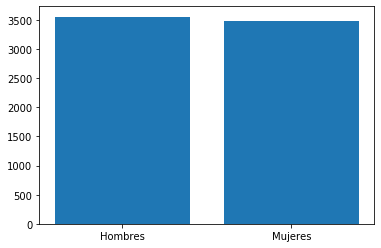

In [13]:
plt.bar(["Hombres", "Mujeres"], [teleco.groupby("gender").size()[0], teleco.groupby("gender").size()[1]])

A continuación se representa el número el numero de meses que los clientes han formado parte de la compañía (en forma de gráfico lineal):

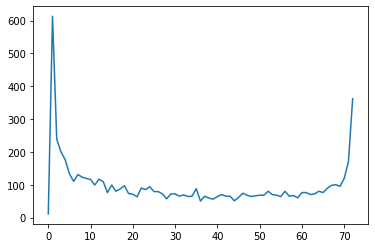

In [14]:
N_de_meses=teleco.groupby("tenure").size()

plt.plot(np.arange(len(teleco.groupby("tenure"))), N_de_meses)